In [ ]:
#todo: this entire notebook

In [1]:
import env_methods as em
import vis_methods as vis
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import matplotlib
import numpy as np
import datetime as dt
import math

In [231]:
#Define bounding box covering Kansas
lat_start = 37
lat_end = 40
lon_start = -102
lon_end =  -95

OKC_lat, OKC_lon = 35.4676, -97.5164
chicago_lat, chicago_lon = 41.8781, -87.6298

#Data paths
main_path = r'C:\Users\bpara\Geo data'

temps_path = r'\temp'
geomean_path = r'\geopotential mean'
rain_path = r'\daily rain 1844'
snow_path = r'\snow depth'
moisture_path = r'\soil moisture'
shum_path = r'\specific humidity'

Import the data

In [218]:
rain_data = em.get_data(main_path+rain_path, True)
rain_data["apcp"] = rain_data["nc_vars"].pop("apcp")
rain_data.pop("nc_vars")


acquring data from apcp.1844.nc


{}

In [240]:
#This generates the data for a time series plot. It averages the data given over the area defined by your bounding box and returns a dict with a time variable, and a 1-D data set of your average

def area_average_tseries(start_time, end_time, lon_min, lon_max, lat_min, lat_max, data, datakey, has_levels, show_area = False, level = 0):
    start_index_time = em.find_closest_val(start_time, data["time"])
    end_index_time = em.find_closest_val(end_time, data["time"])
    
    #This is done because longitude values are 0-360 from Greenwich
    lon_min_i = em.find_closest_val(360 + lon_min, data["lon"])
    lon_max_i = em.find_closest_val(360 + lon_max, data["lon"])
    
    lat_min_i = em.find_closest_val(lat_min, data["lat"])
    lat_max_i = em.find_closest_val(lat_max, data["lat"])

    if show_area:
        fig = plt.figure(figsize = (20, 10))
        ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
        ax.stock_img()
        ax.coastlines()
        plt.plot([data["lon"][lon_min_i], data["lon"][lon_min_i], data["lon"][lon_max_i], data["lon"][lon_max_i], data["lon"][lon_min_i]], 
                 [data["lat"][lat_min_i], data["lat"][lat_max_i], data["lat"][lat_max_i], data["lat"][lat_min_i], data["lat"][lat_min_i]],
                 transform = ccrs.PlateCarree(), color='Blue')
        ax.add_feature(cartopy.feature.LAKES, alpha=1)
        ax.add_feature(cartopy.feature.RIVERS, alpha = 1)
        
        
    average = dict()
    average["time"] = []
    average[datakey] = []
    
    for time in range(start_index_time, end_index_time):
        temp = 0;
        for lat in range(lat_min_i, lat_max_i):
            for lon in range(lon_min_i, lon_max_i):
                if has_levels:
                    temp += data[datakey][time][level][lat][lon]
                else:
                    temp += data[datakey][time][lat][lon]
        temp /= ((lat_max_i - lat_min_i) * (lon_max_i - lon_min_i))
        average["time"].append(data["time"][time])
        average[datakey].append(temp)
    
    return average

In [220]:
def plot_tseries(data, datakey, title, x_title, y_title):
    fig = plt.figure(figsize = (20, 10))
    plt.plot("time", datakey, data=data)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.grid()

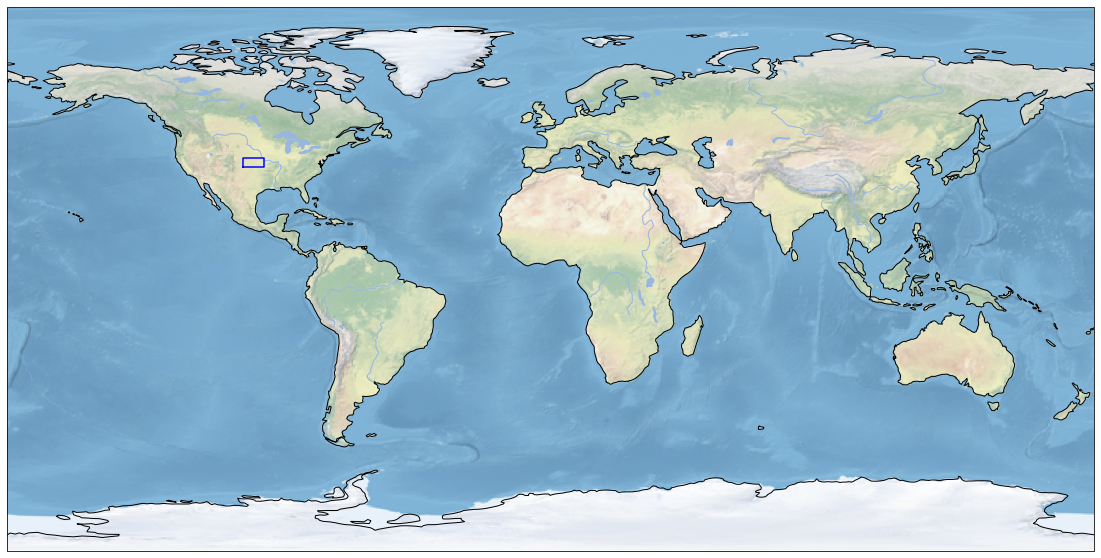

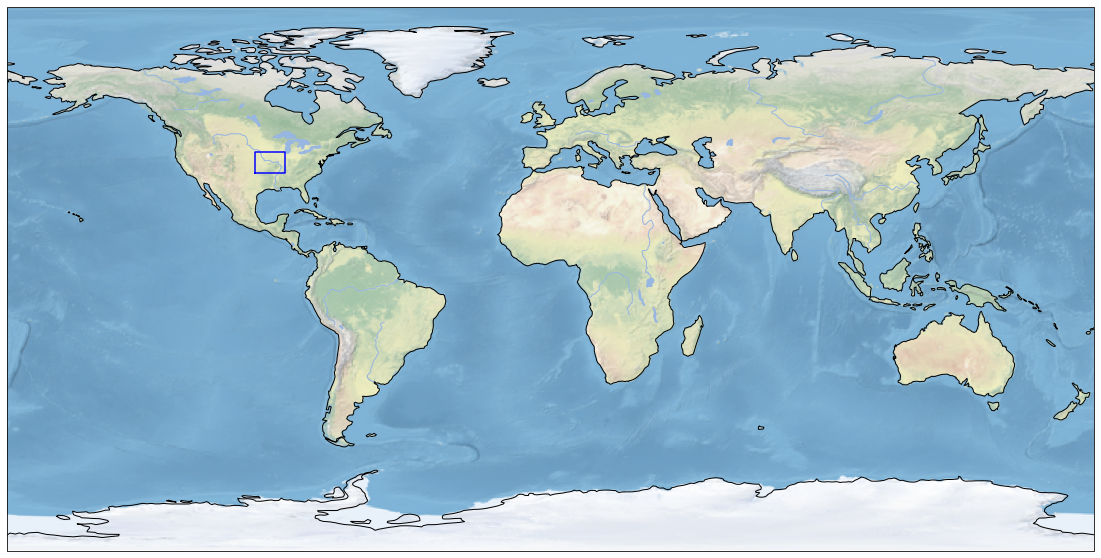

In [242]:
t1 = dt.datetime(1844, 3, 1)
t2 = dt.datetime(1844, 7, 1)
kansas_avg = area_average_tseries(t1, t2, lon_start, lon_end, lat_start, lat_end, rain_data, "apcp", False, True)
mw_avg = area_average_tseries(t1, t2, OKC_lon, chicago_lon, OKC_lat, chicago_lat, rain_data, "apcp", False, True)

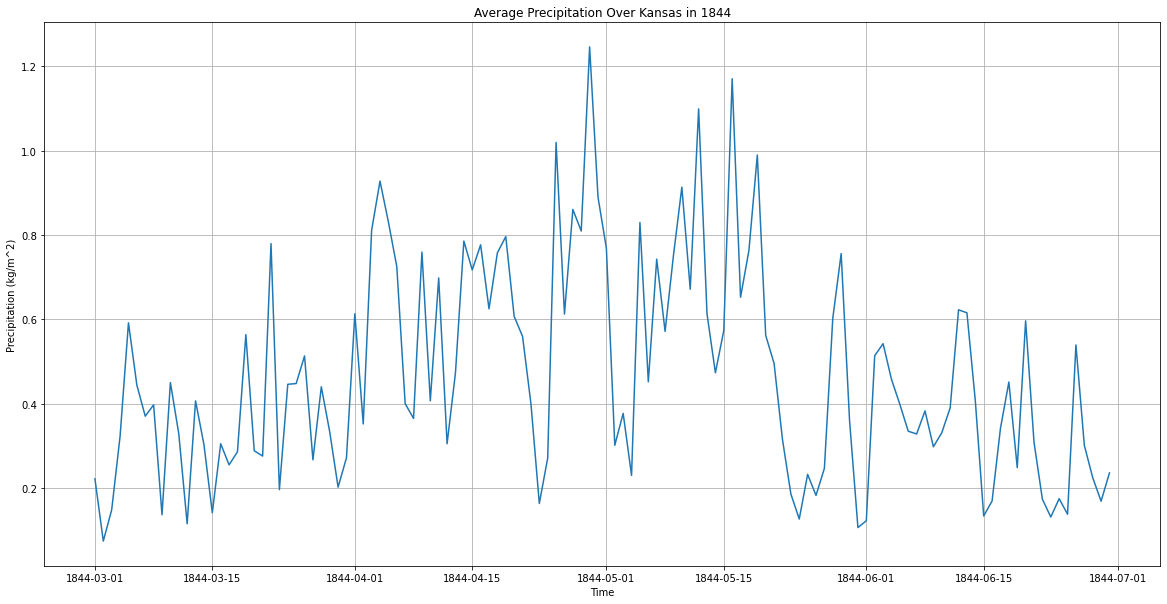

In [223]:
plot_tseries(kansas_avg, "apcp", "Average Precipitation Over Kansas in 1844", "Time", "Precipitation (kg/m^2)")

"The spring of 1844 was warm and very dry until in May, when it began to rain, and continued for six weeks, rain falling every day. The result was the Kaw River rose so high that what is now Kansas City, Kansas, and West Kansas City, Missouri, were covered with fourteen feet of water; the Missouri backed up to the mouth of Line Creek; Jersey Creek was backed up to the crossing on the Parallel road." - A.T. Andreas History of the State of Kansas - 1883. Sourced from (https://play.google.com/books/reader?id=5t09AQAAMAAJ&hl=en&pg=GBS.PA292)

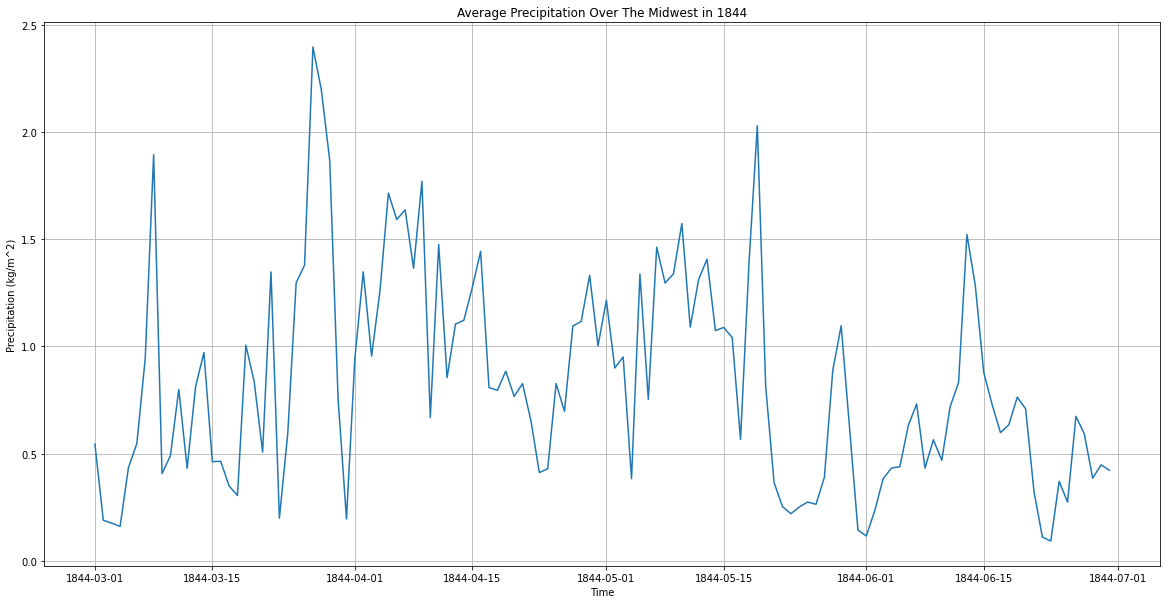

In [243]:
plot_tseries(mw_avg, "apcp", "Average Precipitation Over The Midwest in 1844", "Time", "Precipitation (kg/m^2)")